# Local Search and Optimization Problem #


## Simulated Annealing ##

In [1]:
import logging
import numpy as np
#from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from matplotlib import cm
import random

logging.basicConfig(
    format="[%(asctime)s] %(levelname)s: %(message)s",
    datefmt="%H:%M:%S",
    level=logging.INFO,
)

# test functions 
def rastrigin(x, A=10):
    """NumPy Rastrigin test function"""
    return np.sum(A - A * np.cos(2 * np.pi * x) + x**2, axis=0)

### rastrigin funtion ###

[15:04:05] INFO: 25.0


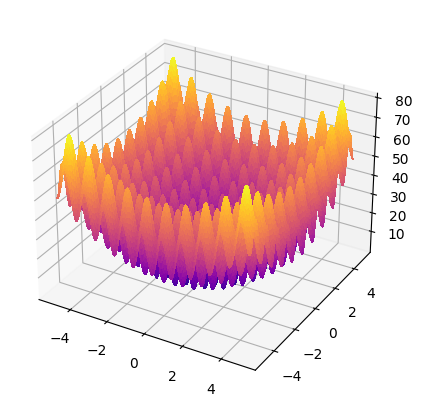

In [2]:
N_POINTS = 200
r = np.linspace(-5, 5, N_POINTS)

x = np.array(np.meshgrid(r, r))
rastr = rastrigin(x)
y = rastrigin(np.array([-5]))
logging.info(f"{y}")
plt.figure(figsize=(5, 5))
ax = plt.axes(projection="3d")
ax.plot_surface(*np.meshgrid(r, r), rastr, rstride=1, cstride=1, cmap=cm.plasma, linewidth=0, antialiased=False)
None

In [3]:
def boltzmann(e_new : float, e: float, temperature: float) -> float:
    return np.exp(-(e_new - e) / temperature)

def linear_temperature_schedule(curr_step, max_step):
    # temperature schedule proportional to the current number of step 
    return max_step - (curr_step + 1) 

def alpha_temperature_schedule(temperature, alpha):
    # reduce the temperature of 10% in each step 
    return alpha * temperature

def probability_function(e, e_new, temperature):
    # lower energy: always picked
    if e_new < e :
        return 1
    return boltzmann(e_new, e, temperature)

def rand_sample(domain):
    domain_len = domain[1] - domain[0]
    rand = random.random() * domain_len + domain[0]
    return rand

def neighbor(s, lower, upper):
    ''' Get a sample from a point ( s: state ) that is max 1, min -1, far from s. If the sample is over the domain it picks the limit of it.'''
    rand_offset = np.random.rand(2) * 2 - 1
    ret = s + rand_offset
    ret[ret < lower] = lower 
    ret[ret > upper] = upper
    return ret

def simulated_annealing(domain: list, obj_function, max_step = 10_000):
    
    # starting point: an np array randomically sampled from the domain [-5, 5][-5, 5]
    start_point = [rand_sample(d) for d in domain ]
    current = np.array(start_point)
    x = []
    y = []
    z = []
    # initial temperature, this value has been picked sufficiently high 
    temperature = 1000
    logging.info(f"Starting point: {current}.")
    for t in range(max_step):

        if temperature == 0:
            return current
        
        # random sample from current point
        next = neighbor(current, -5, 5)
        
        # computing delta from the value of the obj function
        e = obj_function(current)

        x.append(current[0])
        y.append(current[1])
        z.append(e)
        
        e_new = obj_function(next)
        delta_E = e_new - e

        if probability_function(e, e_new, temperature) >= random.random():
            current = next
        # new temperature evaluated through the temperature schedule 
        temperature = alpha_temperature_schedule(temperature, 0.9)
        #logging.info(f"next {current}")
    return current, x, y, z

[15:04:09] INFO: Starting point: [-1.55247398 -4.25686186].
C:\Users\serra\AppData\Local\Temp\ipykernel_18756\2184785111.py:2: RuntimeWarning: overflow encountered in double_scalars
  return np.exp(-(e_new - e) / temperature)
[15:04:10] INFO: [0.00335055 0.01480744]


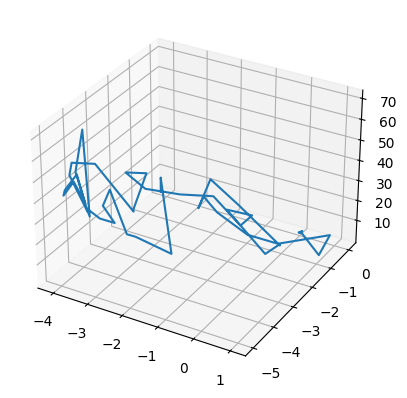

In [4]:
solution, x, y, z = simulated_annealing([[-5, 5], [-5, 5]], rastrigin, 10_000)
logging.info(f"{solution}")
rastrigin(solution)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x,y,z)
plt.show()


In [7]:
from mayavi import  mlab 
X, Y = *np.meshgrid(r, r)
fig = mlab.figure(bgcolor=(1,1,1))
su = mlab.surf(X.T, Y.T, rasp.T)
sc = mlab.plot3d(x, y, z, scale_factor=0.1, scale_mode='none', opacity=1.0, resolution=20, color=(1,0,0))
mlab.show()

ModuleNotFoundError: No module named 'mayavi'